In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('/content/all_seasons.csv' , index_col = 'Unnamed: 0')
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12305 entries, 0 to 12304
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12305 non-null  object 
 1   team_abbreviation  12305 non-null  object 
 2   age                12305 non-null  float64
 3   player_height      12305 non-null  float64
 4   player_weight      12305 non-null  float64
 5   college            12305 non-null  object 
 6   country            12305 non-null  object 
 7   draft_year         12305 non-null  object 
 8   draft_round        12305 non-null  object 
 9   draft_number       12305 non-null  object 
 10  gp                 12305 non-null  int64  
 11  pts                12305 non-null  float64
 12  reb                12305 non-null  float64
 13  ast                12305 non-null  float64
 14  net_rating         12305 non-null  float64
 15  oreb_pct           12305 non-null  float64
 16  dreb_pct           123

In [4]:
df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [5]:
df['player_name'].unique()

array(['Dennis Rodman', 'Dwayne Schintzius', 'Earl Cureton', ...,
       'Marko Simonovic', 'Marcus Garrett', 'Micah Potter'], dtype=object)

In [6]:
df['season'].info()

<class 'pandas.core.series.Series'>
Int64Index: 12305 entries, 0 to 12304
Series name: season
Non-Null Count  Dtype 
--------------  ----- 
12305 non-null  object
dtypes: object(1)
memory usage: 192.3+ KB


In [7]:
top_scorer = pd.DataFrame(df.groupby('player_name')['net_rating'].mean().sort_values(ascending = False)[0:10])

In [8]:
top_scorer

,net_rating
player_name,
Ahmad Caver,133.3
Jerrelle Benimon,120.0
DeJon Jarreau,100.0
Naz Mitrou-Long,83.0
Steven Hill,79.0
J.P. Macura,73.9
Matt Williams Jr.,66.7
Tahjere McCall,63.9
Tyson Wheeler,62.2


In [9]:
df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [10]:
height_data = pd.DataFrame(df.groupby('season')['player_height'].mean().reset_index())

In [11]:
height_data

,season,player_height
0,1996-97,200.994830
1,1997-98,200.619499
2,1998-99,200.903007
3,1999-00,200.920959
4,2000-01,200.752154
5,2001-02,201.017909
6,2002-03,201.520514
7,2003-04,201.315113
8,2004-05,201.245733
9,2005-06,200.920655


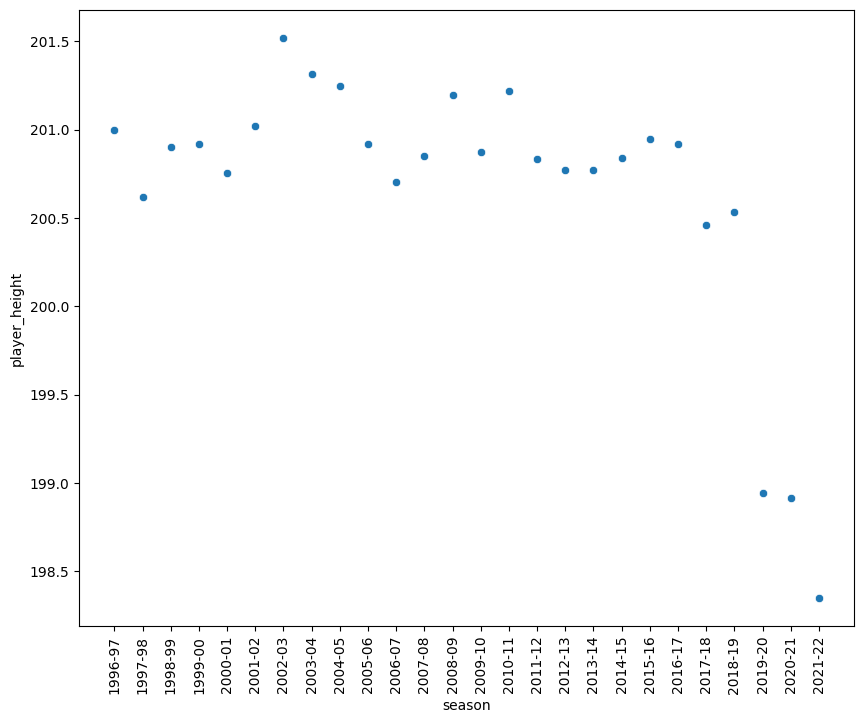

In [12]:
plt.figure(figsize = (10,8) , dpi = 100)
sns.scatterplot(data = height_data ,x = 'season' , y = 'player_height' )
plt.xticks(rotation = 90);

****insight of the above graph is the height is decreasing with increasing year****

In [13]:
weight_data = pd.DataFrame(df.groupby('season')['player_weight'].mean().reset_index())

In [14]:
weight_data

,season,player_weight
0,1996-97,100.526270
1,1997-98,100.265530
2,1998-99,100.639563
3,1999-00,100.735741
4,2000-01,100.842450
5,2001-02,101.288124
6,2002-03,102.032765
7,2003-04,101.635395
8,2004-05,101.697477
9,2005-06,101.340178


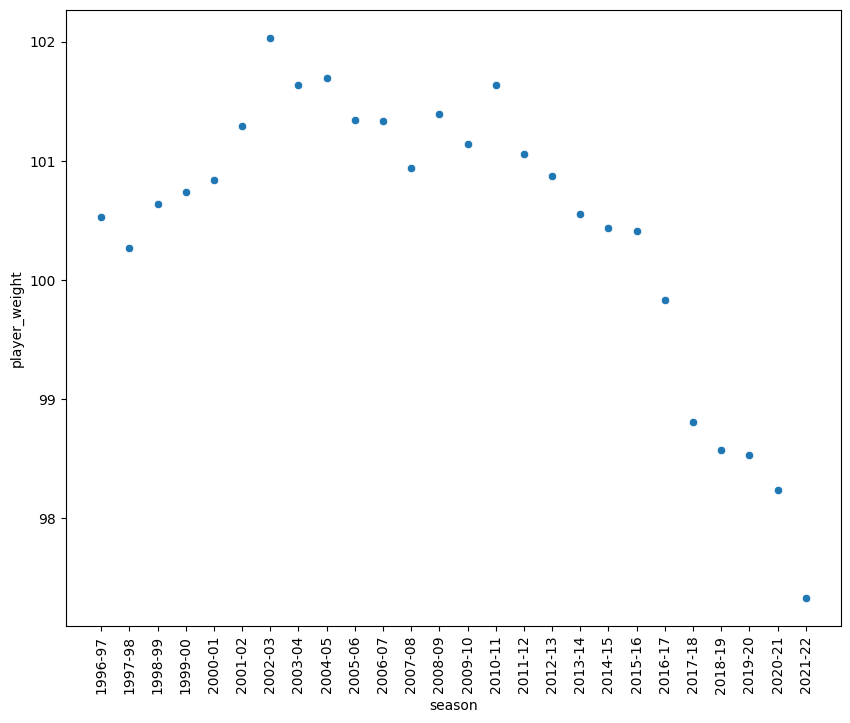

In [15]:
plt.figure(figsize = (10,8) , dpi = 100)
sns.scatterplot(data = weight_data , x = 'season' , y = 'player_weight')
plt.xticks(rotation = 90);

****the insight from top graph is the avg weight is also decreasing year by year****

In [16]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


****now we will see the top 10 rebound player in nba history who takes the ball very early after a missing shot****

In [17]:
reb_data  = pd.DataFrame(df.groupby('player_name')['reb'].mean().sort_values(ascending = False).reset_index()[0:10])

In [18]:
reb_data

,player_name,reb
0,Dennis Rodman,14.150000
1,Andre Drummond,13.100000
2,Jayson Williams,13.033333
3,Charles Barkley,12.000000
4,Dwight Howard,11.527778
5,Rudy Gobert,11.333333
6,Karl-Anthony Towns,11.242857
7,Joel Embiid,11.050000
8,Tim Duncan,10.768421
9,Kevin Love,10.742857


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(reb_data, *['reb'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(reb_data, *['reb'], **{})
chart

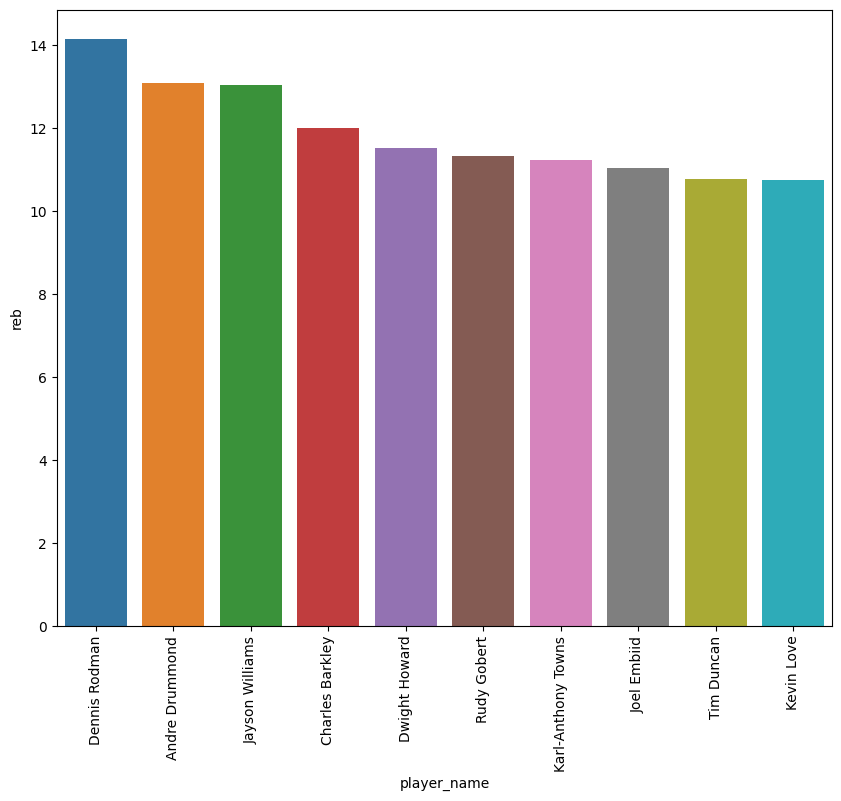

In [19]:
plt.figure(figsize = (10,8) , dpi = 100)
sns.barplot(data = reb_data , x = 'player_name' , y = 'reb')
plt.xticks(rotation = 90);

****now we will see the top 10 point gainer****

In [20]:
pts_data = pd.DataFrame(df.groupby('player_name')['pts'].mean().sort_values(ascending = False).reset_index())[0:10]

In [21]:
pts_data

,player_name,pts
0,LeBron James,27.110526
1,Kevin Durant,27.100000
2,Luka Doncic,26.525000
3,Allen Iverson,26.064286
4,Trae Young,25.600000
5,Joel Embiid,25.450000
6,Michael Jordan,25.300000
7,James Harden,24.853846
8,Damian Lillard,24.830000
9,Zion Williamson,24.750000


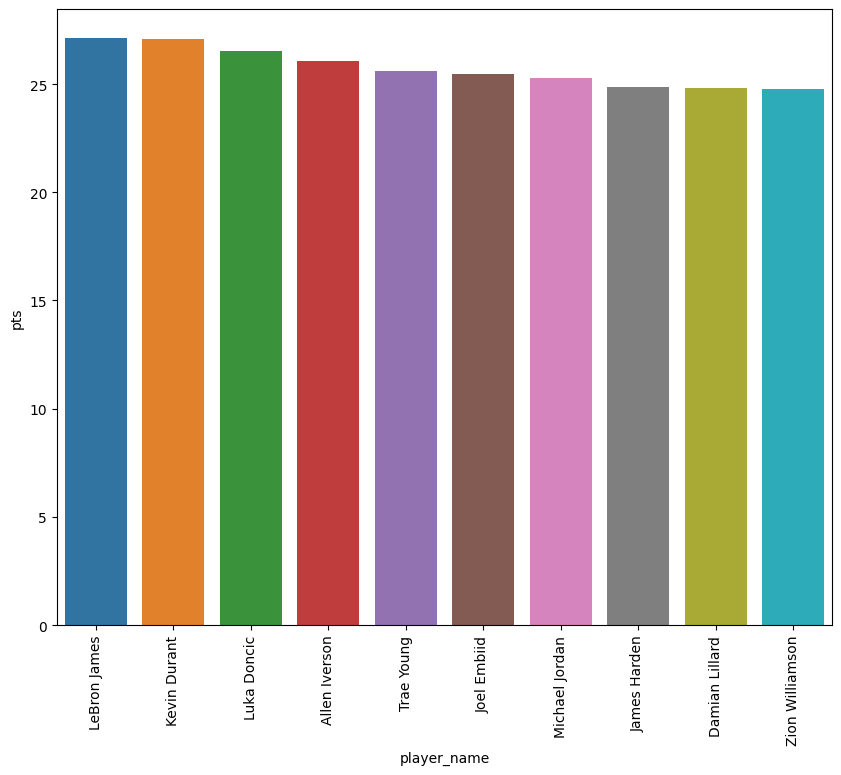

In [22]:
plt.figure(figsize = (10,8) , dpi = 100)
sns.barplot(data = pts_data , x = 'player_name' , y = 'pts')
plt.xticks(rotation = 90);

In [23]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


****top 10 player in nba having heighest average assist****

In [24]:
ast_data = pd.DataFrame(df.groupby('player_name')['ast'].mean().sort_values(ascending = False).reset_index())[0:10]

In [25]:
ast_data

,player_name,ast
0,Chris Paul,9.482353
1,Trae Young,9.125000
2,John Wall,8.880000
3,Jason Kidd,8.682353
4,John Stockton,8.528571
5,Russell Westbrook,8.392857
6,Steve Nash,8.161111
7,Deron Williams,8.025000
8,Luka Doncic,8.025000
9,Rajon Rondo,7.937500


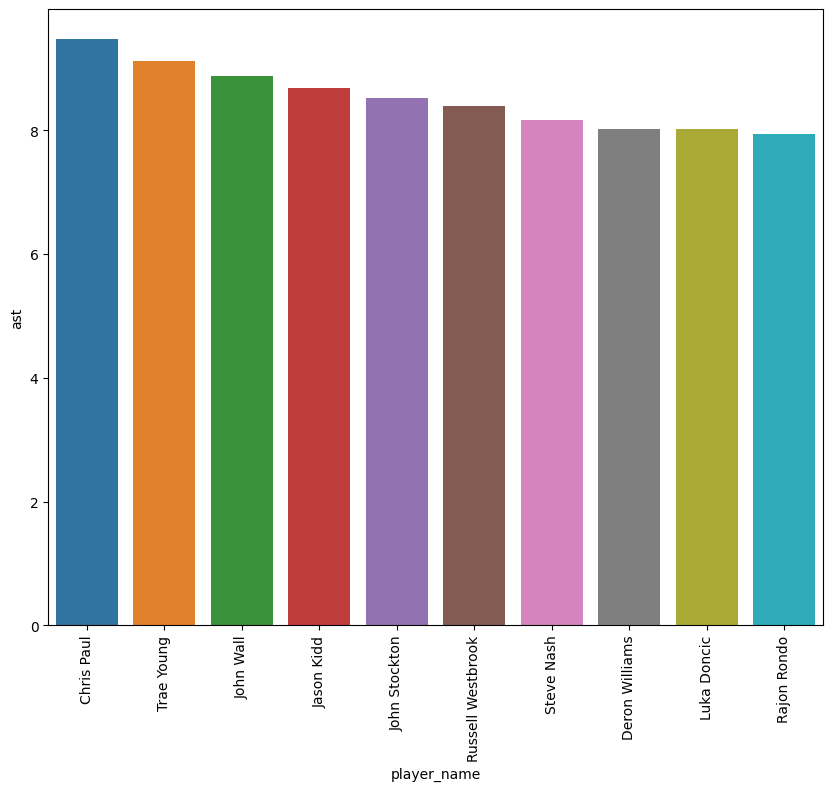

In [26]:
plt.figure(figsize = (10,8), dpi= 100)
sns.barplot(data = ast_data , x = 'player_name' , y = 'ast')
plt.xticks(rotation = 90);

In [27]:
df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

****now we will see top 10 most played individuals in nba****

In [28]:
yp_data = pd.DataFrame(df.groupby('player_name')['gp'].count().sort_values(ascending = False).reset_index())[0:10]

In [29]:
yp_data

,player_name,gp
0,Vince Carter,22
1,Dirk Nowitzki,21
2,Jamal Crawford,20
3,Kevin Garnett,20
4,Kobe Bryant,20
5,Tyson Chandler,19
6,Paul Pierce,19
7,LeBron James,19
8,Carmelo Anthony,19
9,Tim Duncan,19


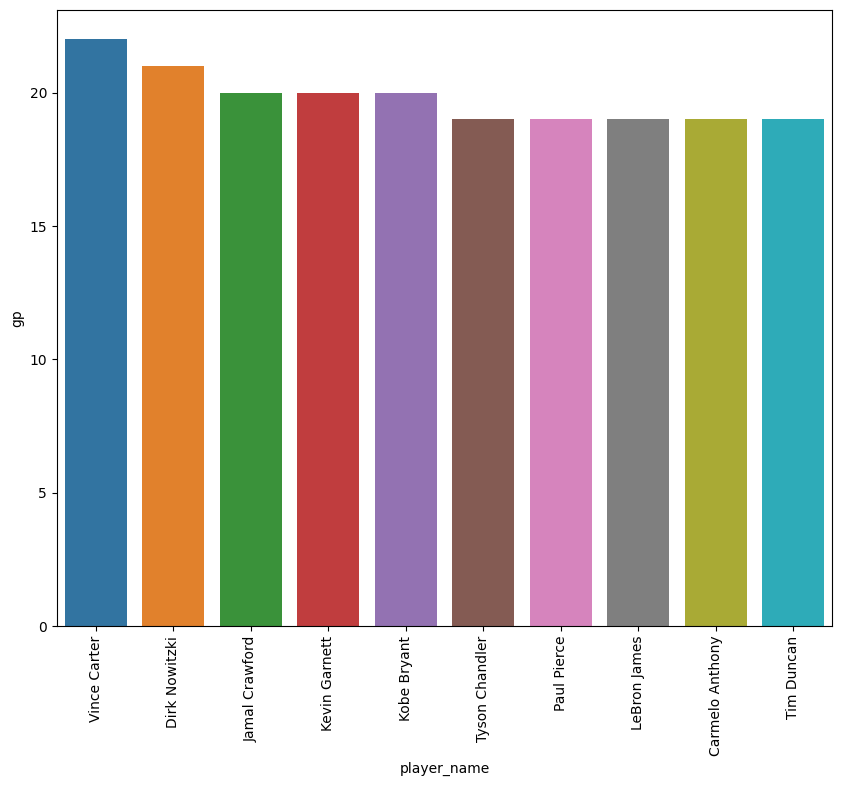

In [30]:
plt.figure(figsize = (10,8) , dpi = 100)
sns.barplot(data = yp_data , x = 'player_name' , y = 'gp')
plt.xticks(rotation = 90);

In [32]:
df_info = pd.read_csv('/content/Nba Player Salaries.csv')
df_info.replace({'\$': '', ',': ''}, regex=True, inplace=True)
df_info.head()

country_codes = pd.read_csv('/content/country_code.csv')

In [33]:
df_info

,Player Id,Player Name,2022/2023,2023/2024,2024/2025,2024/2025.1
0,1,Stephen Curry,48070014,51915615,55761217,59606817
1,2,John Wall,47345760,0,0,0
2,3,Russell Westbrook,47080179,0,0,0
3,4,LeBron James,44474988,46698737,50434636,0
4,5,Kevin Durant,44119845,47649433,51179020,54708608
...,...,...,...,...,...,...
569,570,Gabe York,32171,0,0,0
570,571,Ibou Badji,18226,1761752,0,0
571,572,Tristan Thompson,16700,0,0,0
572,573,RaiQuan Gray,5849,547349,0,0


In [34]:
# change format
for i in df_info.columns[2:]:
    df_info[i] = df_info[i].astype('int64')

# combine dataset

# caculate total salary

df_info['Total Salary'] = df_info['2022/2023'] + df_info['2023/2024'] + df_info['2024/2025'] + df_info['2024/2025.1']

df_total = pd.merge(df_info, df, left_on='Player Name', right_on='player_name', how='left')
df_total.drop('player_name', axis=1, inplace=True)

In [35]:
df_total

,Player Id,Player Name,2022/2023,2023/2024,2024/2025,2024/2025.1,Total Salary,team_abbreviation,age,player_height,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,1,Stephen Curry,48070014,51915615,55761217,59606817,215353663,GSW,22.0,190.50,...,17.5,4.5,5.9,-3.1,0.018,0.118,0.218,0.568,0.241,2009-10
1,1,Stephen Curry,48070014,51915615,55761217,59606817,215353663,GSW,23.0,190.50,...,18.6,3.9,5.8,-0.6,0.023,0.109,0.242,0.595,0.268,2010-11
2,1,Stephen Curry,48070014,51915615,55761217,59606817,215353663,GSW,24.0,190.50,...,14.7,3.4,5.3,5.4,0.023,0.111,0.235,0.605,0.295,2011-12
3,1,Stephen Curry,48070014,51915615,55761217,59606817,215353663,GSW,25.0,190.50,...,22.9,4.0,6.9,2.4,0.022,0.092,0.261,0.589,0.298,2012-13
4,1,Stephen Curry,48070014,51915615,55761217,59606817,215353663,GSW,26.0,190.50,...,24.0,4.3,8.5,9.4,0.018,0.108,0.281,0.610,0.372,2013-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,572,Tristan Thompson,16700,0,0,0,16700,CLE,29.0,205.74,...,12.0,10.1,2.1,-10.1,0.126,0.207,0.181,0.540,0.106,2019-20
2388,572,Tristan Thompson,16700,0,0,0,16700,BOS,30.0,205.74,...,7.6,8.1,1.2,1.0,0.124,0.212,0.144,0.540,0.073,2020-21
2389,572,Tristan Thompson,16700,0,0,0,16700,CHI,31.0,205.74,...,6.0,5.1,0.6,-3.6,0.125,0.196,0.168,0.541,0.054,2021-22
2390,573,RaiQuan Gray,5849,547349,0,0,553198,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
country_codes = country_codes[['Country_name', 'code_3digit']]
country_codes = country_codes.rename({'Country_name': 'country'}, axis=1)
country_codes['country'] = country_codes['country'].replace({'United States of America': 'USA', 'Russian Federation':'Russia',
                                                             'Venezuela (Bolivarian Republic)':'Venezuela', 'Korea (South)':'South Korea',
                                                             'Tanzania, United Republic of':'Tanzania','Macedonia, Republic of':'Macedonia',
                                                             'Congo, (Kinshasa)':'Democratic Republic of the Congo',
                                                             'Congo (Brazzaville)':'Congo','Iran, Islamic Republic of':'Iran',
                                                             'Virgin Islands, US':'US Virgin Islands',
                                                             })
# Fix country names

df_total['country'] = df_total['country'].replace({'Great Britain':'United Kingdom','England':'United Kingdom','Scotland':'United Kingdom',
                                       'Bosnia & Herzegovina':'Bosnia and Herzegovina','Bosnia':'Bosnia and Herzegovina',
                                       'Cabo Verde':'Cape Verde','St. Vincent & Grenadines':'Saint Vincent and Grenadines'})

In [41]:
#Tree Maps

df_pub = df_total[['country','Player Name','Total Salary']].groupby(['country','Player Name']).sum().reset_index()
df_pub_tree = df_pub.reset_index()
df_pub_tree.head()

fig = px.treemap(df_pub_tree, path=['country', 'Player Name'], values='Total Salary',
                    color='Total Salary', hover_data=['Total Salary'],
                    color_continuous_scale='RdBu', title='Total Salary by Country and Player Name')

fig.update_layout(template='plotly_white')

fig.show()

In [39]:
df_pub = df_total[['college','Player Name','Total Salary']].groupby(['college','Player Name']).sum().reset_index()
df_pub_tree = df_pub.reset_index()

fig = px.treemap(df_pub_tree, path=['college', 'Player Name'], values='Total Salary',
                    color='Total Salary', hover_data=['Total Salary'],
                    color_continuous_scale='RdBu', title='Total Salary by College and Player Name')


fig.update_layout(template='plotly_white')

fig.show()

In [42]:
df_need = df_total[['Player Name','country','Total Salary']].drop_duplicates()
df_need = pd.merge(df_need, country_codes, how='inner', on='country')
df_need = df_need.groupby(['code_3digit','country']).sum('Total Salary').reset_index()

In [43]:
import plotly
import plotly.graph_objects as go

salary_map = go.Choropleth(
    locations = df_need['code_3digit'],
    z = df_need['Total Salary'],
    text = df_need['country'],
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorscale = 'Blues',
    colorbar_title = 'Player Salary'
)


layout = dict(
             title_text='Top NBA Player Salary by Country',
             geo=dict(
                showframe=False,
                showcoastlines=False,
                projection_type='equirectangular'),
             margin=dict(l=0, r=0, b=0),
             height=500
             )

fig = dict(data=salary_map, layout=layout)

plotly.offline.iplot(fig)